<a href="https://colab.research.google.com/github/Zzmirror/Machine-learning-Basic-projects/blob/main/Regression/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression from scratch



#  loading and visualizing 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
def load_data(file_path):
  data = np.loadtxt(file_path , delimiter=",")
  x = data[: , :2]
  y = data[: , 2]

  return x , y

In [ ]:
x_train , y_train = load_data('/content/ex2data1.txt')



> Checking some elements of data



In [ ]:
print("First five elements in x_train are : \n" , x_train[:5] , "\n type :" , type(x_train))
print("-------------------------------------")
print("First five elements in y_train are : \n" , y_train[:5] , "\n type :" , type(y_train))

First five elements in x_train are : 
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]] 
 type : <class 'numpy.ndarray'>
-------------------------------------
First five elements in y_train are : 
 [0. 0. 0. 1. 1.] 
 type : <class 'numpy.ndarray'>




> Checking dimention of our variables



In [ ]:
print("Shape of x_train is :" , x_train.shape)
print("Shape of y_train is :" , y_train.shape)
print("Numberof samples : " , len(y_train))

Shape of x_train is : (100, 2)
Shape of y_train is : (100,)
Numberof samples :  100




> Visualize data



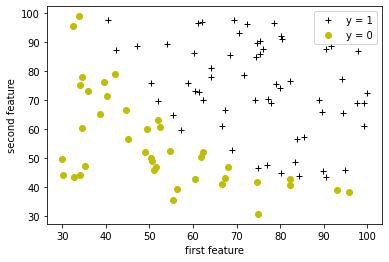

In [ ]:

positive = y_train == 1
negative = y_train == 0

plt.plot(x_train[positive , 0] , x_train[positive , 1] , "k+" , label = "y = 1")
plt.plot(x_train[negative , 0] , x_train[negative , 1] , "yo" , label = "y = 0")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc="upper right")

# Building Model




> Model : Sigmoid Function


\begin{align}
    f(x) = g( wa+b)
\end{align}

\begin{align}
    g(z) = \frac{1}{1 +  e^{-z}}
\end{align}

In [ ]:
def sigmoid(z):
  """
  compute the sigmoid of z

  Args :
    z (ndarray): A scalar, numpy array of any size.

  Return :
    g (ndarray): sigmoid(z), with the same shape as z

  """

  g = 1 / (1 + np.exp(-z))

  return g



> Cost function :



\begin{align}
J(w , b) = \frac{1}{m}\sum_{i=1}^m [ loss (f(x^i) , y^i)]
\end{align}


> Loss :

\begin{align}
loss(f(x^i) , y^i) = (-y^{i} log(f(x^i)))-(1-y^i)log(1-f(x^i))
\end{align}


In [ ]:
def cost_function(x , y , w , b , lambda_) :
  """
  compute total cost over all samples

  Arges :
    x : (ndarray Shape (m,n)) data, m examples by n features
    y : (array_like Shape (m,)) target value 
    w : (array_like Shape (n,)) Values of parameters of the model      
    b : scalar Values of bias parameter of the model

  Return :
    total_cost : (scalar)         cost

  """

  m , n = x.shape
  loss = 0

  for i in range(m):
    z = np.dot(x[i] , w) + b
    predict = sigmoid(z)
    loss += (-y[i] * np.log(predict)) - ((1 - y[i]) * np.log(1 - predict))

  total_cost = loss / m

  return total_cost



> Gradient Discent

\begin{align}
  w =w-a\cdot\frac{\partial J}{\partial w} := w -a\cdot\frac{1}{n}\sum_{i=1}^n (h(x)^i - y^i)x^i
  \end{align}	 
\begin{align}
  b =b-a\cdot\frac{\partial J}{\partial b}:= b -a\cdot\frac{1}{n}\sum_{i=1}^n (h(x)^i - y^i)
\end{align}



In [ ]:
def compute_gradient(x , y , w , b , lambda_):
  """
  computes gradient discent for logistic regression

  Arges :

    x : (ndarray shape (m ,n)) data with m samples and n features
    y : (array_like shape (m,)) target values
    w : (array_like shape (n,)) weight for features
    b : (scaler) Values of bias parameter of the model

  Returns : 
  dj_dw : (array_like shape (n,))
  dj_db : (scalar)

  """
  dj_dw = np.zeros(w.shape)
  dj_db = 0.0

  m , n = x.shape

  for i in range(m) : 
    z = np.dot(x[i] , w) + b
    predict = sigmoid(z)
    error = predict - y[i]

    for j in range(n):
      dj_dw[j] += error*x[i , j]

    dj_db += error

  
  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw , dj_db



# train the Model

In [ ]:
def gradient_discent(x , y , w , b , cost_function, gradient_function, alpha, num_iters, lambda_):

  w_history = []
  cost_history = []

  for i in range(num_iters):
    dj_dw , dj_db = gradient_function(x , y , w , b , lambda_)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i<100000:      # prevent resource exhaustion 
      cost = cost_function(x , y , w , b , lambda_)
      cost_history.append(cost)

    if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
      w_history.append(w)
      print(f"Iteration {i:4}: Cost {float(cost_history[-1]):8.2f} ")

  return w, b, cost_history, w_history



In [ ]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_discent(x_train ,y_train, intial_w, initial_b, cost_function, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96 
Iteration 1000: Cost     0.31 
Iteration 2000: Cost     0.30 
Iteration 3000: Cost     0.30 
Iteration 4000: Cost     0.30 
Iteration 5000: Cost     0.30 
Iteration 6000: Cost     0.30 
Iteration 7000: Cost     0.30 
Iteration 8000: Cost     0.30 
Iteration 9000: Cost     0.30 
Iteration 9999: Cost     0.30 




> Prediction :

if
\begin{align}
 f(x^i) > 0.5 , predict y^i = 1
\end{align}

if 

\begin{align}
 f(x^i) < 0.5 , predict y^i = 0
\end{align}



In [ ]:
def predict(x , w , b ,treshold ):
  """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model
    treshold : a number that define our treshhold

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
  """

  m , n = x.shape
  p = np.zeros(m)

  for i in range(m):

    z = np.dot(x[i] , w) + b
    prediction = sigmoid(z)

    if prediction > treshold :
      p[i] = 1
    else :
      p[i] = 0
    
  return p





> accuracy :



In [ ]:
prediction = predict(x_train , w , b , 0.5  )
print("Train accuracy: %f"%(np.mean(prediction == y_train)*100))

Train accuracy: 92.000000


# Regularization

When we have a lot of features , our model mostly will over fit .
To avoid a complex model and overfiting we will omit some features affect will regularization .



> Cost funcation for regularized logistic regression 


\begin{align}
J(w , b) = \frac{1}{m}\sum_{i=1}^m [ -y^{i} log(f(x^i))-(1-y^i)log(1-f(x^i))] + \frac {λ}{2m} \sum_{j=0}^{n-1}w_j^2
\end{align}






In [ ]:
def regularized_cost(x , y , w , b , lambda_ = 1) :
  cost = cost_function(x , y , w , b , lambda_)

  m , n = x.shape
  reg_cost = 0.

  for i in range(n) :
    reg_cost += w[i] ** 2
  
  total_cost = cost + (lambda_  / (2 * m)) * reg_cost
  return total_cost




> Gradient Discent with Regularization 

\begin{align}
  w =w-a\cdot\frac{\partial J}{\partial w} := w -a\cdot\frac{1}{n}\sum_{i=1}^n (h(x)^i - y^i)x^i + \frac{\lambda * w}{m}
  \end{align}	 
\begin{align}
  b =b-a\cdot\frac{\partial J}{\partial b}:= b -a\cdot\frac{1}{n}\sum_{i=1}^n (h(x)^i - y^i)
\end{align}



In [ ]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b , lambda_)

    ### START CODE HERE ###   
    
    for j in range(n):
        dj_dw[j] += (lambda_ * w[j])/m
        
    
        
    ### END CODE HERE ###         
        
    return dj_db, dj_dw